## Experiment Proposal For Reducing Car Thefts in Chicago

Thousands of cars are being stolen in the city of Chicago every year. I will show when and where these thefts are taking place and propose a strategy to reduce the number of thefts that are taking place and give a timeline, suggested implementation of my plan, and outline what would constitute success in this plan.

Feel free to skip along to the graphs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import folium
import seaborn as sns
from folium import plugins
from folium.plugins import HeatMap
from scipy.stats import ttest_ind
from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
theft = pd.read_csv('Car_thefts2016_copy.csv')

In [5]:
#Creating a DateTime Column
new_column = []

for date in theft['Date']:
    date_format = "%m/%d/%Y %I:%M:%S %p"
    new_column.append(datetime.strptime(date, date_format))
theft['DateTime'] = new_column

In [6]:
#Creating more date related columns
theft['Month'] = theft['DateTime'].apply(lambda x: x.month)
theft['Hour'] = theft['DateTime'].apply(lambda x: x.hour)
theft['Day'] = theft['DateTime'].apply(lambda x: x.day)
theft['Day of week'] = theft['DateTime'].apply(lambda x: x.dayofweek)

In [7]:
month_of_theft = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
time_of_crime = ['12a', '1a', '2a', '3a', '4a', '5a', '6a', '7a', '8a', '9a', '10a', '11a', '12p', '1p', '2p', '3p', '4p', '5p', '6p', '7p', '8p', '9p', '10p', '11p']
weekday_of_crime = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']

In [8]:
theft_caught = theft[theft['Arrest'] == True]
theft_not_caught = theft[theft['Arrest'] == False]

In [11]:
#converting Latitude and Longitude columns into lists
lat = list(theft['Latitude'])
lon = list(theft['Longitude'])

In [12]:
#Generating a Folium Map in Chicago
m = folium.Map(location=[41.868035989, -87.721605044], zoom_start=10)

In [13]:
#Getting our data into the right format, removing any missing listings
heat_theft = theft
heat_theft = heat_theft[['Latitude', 'Longitude']]
heat_theft = heat_theft.dropna(axis=0, subset=['Latitude', 'Longitude'])

In [14]:
heat_data = [[row['Latitude'], row['Longitude']] for index, row in heat_theft.iterrows()]

In [15]:
HeatMap(heat_data, radius=17).add_to(m)

In [17]:
lat_caught = list(theft_caught['Latitude'])
lon_caught = list(theft_caught['Longitude'])
m_caught = folium.Map(location=[41.868035989, -87.721605044], zoom_start=10)

#Getting our data into the right format, removing any missing listings
heat_theft_caught = theft_caught
heat_theft_caught = heat_theft_caught[['Latitude', 'Longitude']]
heat_theft_caught = heat_theft_caught.dropna(axis=0, subset=['Latitude', 'Longitude'])
heat_data_caught = [[row['Latitude'], row['Longitude']] for index, row in heat_theft_caught.iterrows()]
HeatMap(heat_data_caught, radius=17).add_to(m_caught)

In [19]:
lat_not_caught = list(theft_not_caught['Latitude'])
lon_not_caught = list(theft_not_caught['Longitude'])
m_not_caught = folium.Map(location=[41.868035989, -87.721605044], zoom_start=10)
#Getting our data into the right format, removing any missing listings
heat_theft_not_caught = theft_not_caught
heat_theft_not_caught = heat_theft_not_caught[['Latitude', 'Longitude']]
heat_theft_not_caught = heat_theft_not_caught.dropna(axis=0, subset=['Latitude', 'Longitude'])
heat_data_not_caught = [[row['Latitude'], row['Longitude']] for index, row in heat_theft_not_caught.iterrows()]
HeatMap(heat_data_not_caught, radius=17).add_to(m_not_caught)

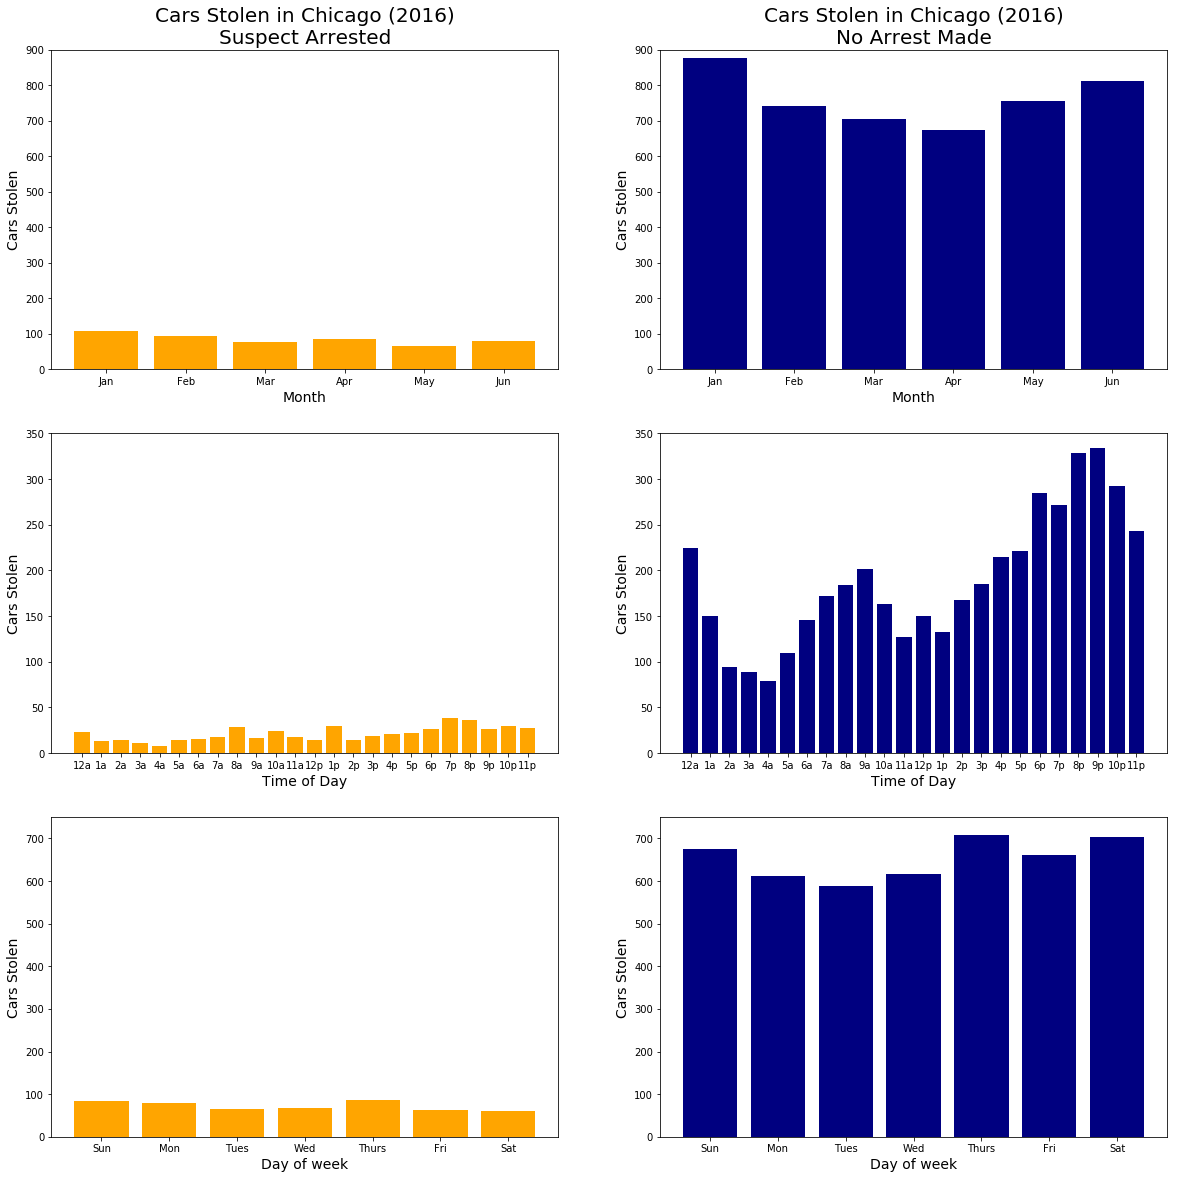

In [24]:
plt.figure(figsize=(20,20))

#top left
plt.subplot(3, 2, 1)
plt.bar(month_of_theft, theft_caught['Month'].value_counts().sort_index(), color='orange')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)\nSuspect Arrested', fontsize=20)
plt.ylim(0, 900)

#middle left
plt.subplot(3,2,3)
plt.bar(time_of_crime, theft_caught['Hour'].value_counts().sort_index(), color='orange')
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.ylim(0, 350)

#bottom left
plt.subplot(3, 2, 5)
plt.bar(weekday_of_crime, theft_caught['Day of week'].value_counts().sort_index(), color='orange')
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.ylim(0, 750)


#top right
plt.subplot(3, 2, 2)
plt.bar(month_of_theft, theft_not_caught['Month'].value_counts().sort_index(), color='navy')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)\nNo Arrest Made', fontsize=20)
plt.ylim(0, 900)

#middle right
plt.subplot(3, 2, 4)
plt.bar(time_of_crime, theft_not_caught['Hour'].value_counts().sort_index(), color='navy')
plt.ylim(0, 350)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)

#bottom right
plt.subplot(3, 2, 6)
plt.bar(weekday_of_crime, theft_not_caught['Day of week'].value_counts().sort_index(), color='navy')
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.ylim(0, 750)

plt.show()

## When are people stealing cars?

As you can see, cars are stolen with surprising consistency month to month and day to day. It is the time of day that seems to change the number of thefts that will take place.

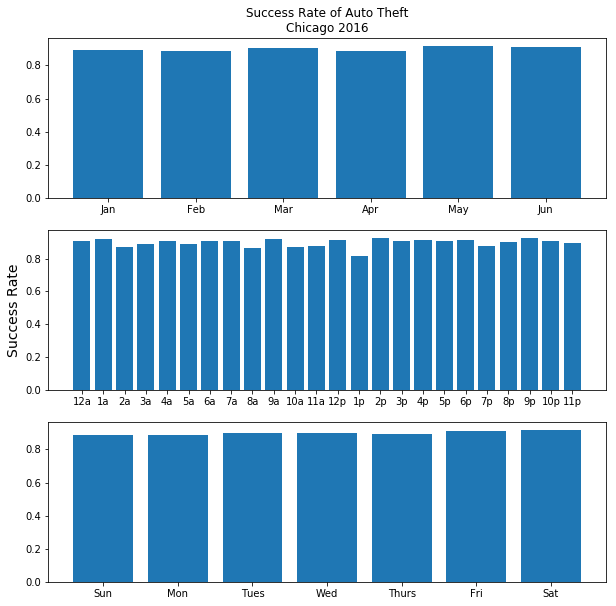

In [25]:
plt.figure(figsize=(10,10))

plt.subplot(3, 1, 1)
plt.title("Success Rate of Auto Theft\nChicago 2016")
plt.bar(month_of_theft , theft_not_caught['Month'].value_counts().sort_index()/theft['Month'].value_counts().sort_index())


plt.subplot(3, 1, 2)
plt.bar(time_of_crime, theft_not_caught['Hour'].value_counts().sort_index()/theft['Hour'].value_counts().sort_index())
plt.ylabel('Success Rate', fontsize=14)

plt.subplot(3, 1, 3)
plt.bar(weekday_of_crime, theft_not_caught['Day of week'].value_counts().sort_index()/theft['Day of week'].value_counts().sort_index())

plt.show()

## How successful are the thieves based on when they steal?

Car thieves are pretty darn consistent. They are getting away with it all month/week/day.

## Where are cars being stolen?

As you will see from the following HeatMap, all over the city.

In [20]:
m

## Where are people getting caught?

In [21]:
m_caught

## Where are people getting away with it?

If you carefully compare this HeatMap with the previous one, you will come to notice that the areas around the airport are the main places where people are getting away with stealing cars.

In [22]:
m_not_caught

## Summary of the problem

Cars are being stolen at an alarming rate. Roughly 90% of these thefts go without anyone getting arrested.

Cars are being stolen just as successfully at any time of the day/week/month, but not in equal number. Many more cars are stolen in the evening than in the morning/midday.

Car thieves are taking cars from near the airports with almost no trouble whatsoever.

As law and order is our highest priority, we would like to reduce the number of cars that get stolen and also reduce the rate of success for the car thieves.

In brief, we want to catch thieves and also deter them.

## What can we do about it?

Longterm solutions could involve investing more money into education or making sure there are cops living in strategic locations throughout the city and trouble zones.

In the meantime, I propose that we run an experiment to see if we can deter people from stealing cars immediately. We have data on six months, let's see if we can drastically improve the next six months.

We can send flyers to people in the city. The flyers will warn give helpful advice about protecting their cars to car owners, give a hotline number to call if they see or hear anything about cars being stolen, and also remind everyone, thieves and owners alike that this is a felony and also the raw number of car thieves that were arrested in Chicago.

## How will we implement the solution?

I recommend we run an A/B test. Our previous data shows remarkable consistency in how many cars are being stolen at certain times and in certain locations. This data is systematically recorded by the City of Chicago. This will make gathering the information very easy.

In order to implement the test, I recommend posting these flyers in the trouble areas, especially around the airport. This is because the geographical location has been shown to be the best way of predicting car thefts.

Hypothesis: I predict that there will be a decrease in the number of cars stolen in the six months that we roll out these flyers.

## What constitutes success after six months?

The results from this first six months will determine how we proceed:

Monthly car thefts increase : Abandon hope
Monthly car thefts decrease by < 10% : Continue monitoring for another six months to try to gain more statistical significance.
Monthly car thefts are reduced by > 10% : Determine that the flyer is successful.

We will compare the new monthly car thefts to the monthly car thefts from the six months of data we already had. We will test the null hypothesis that the flyers made no difference by using a t-test to see how likely the new results are due to random chance and not due to the flyer at all. If all goes well, we will end up with a p-value < .05 and we can assume that the flyers were successful.

## Other important information:

The main goal of this proposal is to deter car thefts, but it is possible that we will be having an impact on the success rate of car thefts as well and we should monitor that closely.